In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error as mse, r2_score
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from scipy import stats
import tkinter as tk
from tkinter import ttk, messagebox
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
tesla = pd.read_csv('TSLA.csv')
tesla['Date']=pd.to_datetime(tesla['Date'])
print(f' data is {tesla.Date.min()}{tesla.Date.max()}')
print(f' Total days is ={(tesla.Date.max() - tesla.Date.min()).days} days')

 data is 2010-06-29 00:00:002022-03-24 00:00:00
 Total days is =4286 days


In [3]:
correlation_matrix = tesla.corr()
print(correlation_matrix)

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.666953  0.666909  0.667296  0.667145   0.667145   
Open       0.666953  1.000000  0.999726  0.999617  0.999247   0.999247   
High       0.666909  0.999726  1.000000  0.999595  0.999666   0.999666   
Low        0.667296  0.999617  0.999595  1.000000  0.999670   0.999670   
Close      0.667145  0.999247  0.999666  0.999670  1.000000   1.000000   
Adj Close  0.667145  0.999247  0.999666  0.999670  1.000000   1.000000   
Volume     0.430619  0.089750  0.093625  0.085906  0.090602   0.090602   

             Volume  
Date       0.430619  
Open       0.089750  
High       0.093625  
Low        0.085906  
Close      0.090602  
Adj Close  0.090602  
Volume     1.000000  


In [4]:
columns_to_drop = ['Open', 'High', 'Low', 'Adj Close']  # Column names as a list
tesla = tesla.drop(columns=columns_to_drop, axis=1)

In [5]:
tesla

,Date,Close,Volume
0,2010-06-29,4.778000,93831500
1,2010-06-30,4.766000,85935500
2,2010-07-01,4.392000,41094000
3,2010-07-02,3.840000,25699000
4,2010-07-06,3.222000,34334500
...,...,...,...
2951,2022-03-18,905.390015,33408500
2952,2022-03-21,921.159973,27327200
2953,2022-03-22,993.979980,35289500
2954,2022-03-23,999.109985,40225400


In [6]:
z_scores = stats.zscore(tesla['Close'])
outliers = np.where(np.abs(z_scores) > 3)  # Define a threshold (e.g., z-score > 3) for outliers
tesla_without_outliers = tesla.drop(outliers[0])

In [7]:
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#53a832'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#a832a8'
        )
    )
)

tesla_data = [{'x': tesla_without_outliers['Date'], 'y': tesla_without_outliers['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)
iplot(plot)

In [8]:
tesla_without_outliers['MA_30'] = tesla_without_outliers['Close'].rolling(window=30).mean().shift(1)

# Updated Features and Target
X = tesla_without_outliers[['Close', 'MA_30']].dropna()
y = X['Close']
X = X.drop(columns=['Close'])
X

,MA_30
30,4.008267
31,3.968333
32,3.926800
33,3.902533
34,3.899733
...,...
2946,833.046330
2947,833.466329
2948,832.558329
2949,833.104997


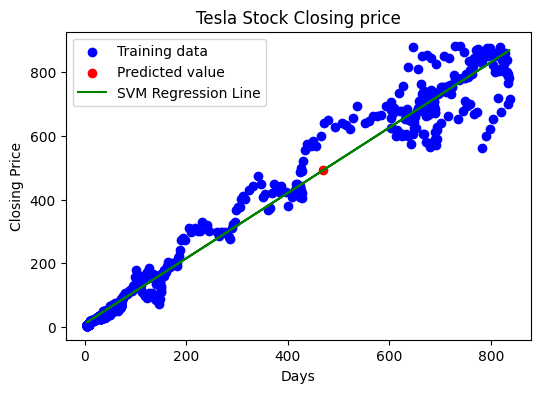

In [15]:
class SVMRegressionGUI(tk.Tk):
    def __init__(self, X, y):
        super().__init__()
        self.title("SVM REGRESSION MODEL")
        
        # Store input data and target data
        self.X = np.array(X)  # Input features
        self.y = np.array(y)  # Target variable
        
        # Perform data preprocessing or standardization if needed
        self.scaler_X = StandardScaler()
        self.scaler_y = StandardScaler()
        self.X_scaled = self.scaler_X.fit_transform(self.X)
        self.y_scaled = self.scaler_y.fit_transform(self.y.reshape(-1, 1)).flatten()
        
        # Split data into train and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X_scaled, self.y_scaled, test_size=0.2, random_state=42)
        
        # Initialize SVM model
        self.svm_model = SVR(kernel='linear')
        
        # Train SVM model
        self.train_model()
        
        # Create GUI components
        self.create_widgets()
    
    def train_model(self):
        # Train the SVM regression model
        self.svm_model.fit(self.X_train, self.y_train)
    
    def predict(self, x):
        # Make predictions using the trained model
        x_scaled = self.scaler_X.transform(np.array(x).reshape(-1, 1))
        y_pred_scaled = self.svm_model.predict(x_scaled)
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
        return y_pred
    
    def evaluate_model(self):
        # Evaluate the model on the test set
        y_pred_test = self.predict(self.X_test)
        mae = mean_absolute_error(self.y_test, y_pred_test)
        rmse = np.sqrt(mean_squared_error(self.y_test, y_pred_test))
        return mae, rmse
    
    def create_widgets(self):
        # Create input label and entry
        self.input_label = ttk.Label(self, text="Input (X) where 0 < X < 835")
        self.input_label.pack(pady=10)

        self.input_entry = ttk.Entry(self)
        self.input_entry.pack(pady=5)

        # Create predict button
        self.predict_button = ttk.Button(self, text="Predict", command=self.show_prediction)
        self.predict_button.pack(pady=10)

        # Create plot area
        self.fig, self.ax = plt.subplots(figsize=(6, 4))
        self.plot_canvas = FigureCanvasTkAgg(self.fig, self)
        self.plot_canvas.get_tk_widget().pack(padx=10, pady=10)

        # Create predicted value label
        self.prediction_label = ttk.Label(self, text="Predicted Value: -")
        self.prediction_label.pack(pady=5)

        # Display accuracy and error labels
        self.accuracy_label = ttk.Label(self, text="Mean Absolute Error: -")
        self.accuracy_label.pack(pady=5)

        self.error_label = ttk.Label(self, text="Root Mean Squared Error: -")
        self.error_label.pack(pady=5)

    
    def show_prediction(self):
        # Get input value from entry widget
        input_value = self.input_entry.get()

        # Validate input value
        try:
            input_value = float(input_value)
        except ValueError:
            tk.messagebox.showerror("Error", "Invalid input. Please enter a numeric value.")
            return

        # Reshape input value for prediction
        x_pred = np.array([[input_value]])

        # Make prediction using the input value
        y_pred = self.predict(x_pred)

        # Update predicted value label
        self.prediction_label.config(text=f"Predicted Value: {y_pred[0]:.4f}")

        # Update plot with predicted value
        self.ax.clear()
        self.ax.scatter(self.scaler_X.inverse_transform(self.X_train), self.scaler_y.inverse_transform(self.y_train.reshape(-1, 1)), color='blue', label='Training data')
        self.ax.scatter(input_value, y_pred, color='red', label='Predicted value')
        self.ax.plot(self.scaler_X.inverse_transform(self.X_train), self.scaler_y.inverse_transform(self.svm_model.predict(self.X_train).reshape(-1, 1)), color='green', label='SVM Regression Line')
        self.ax.set_xlabel('Days')
        self.ax.set_ylabel('Closing Price')
        self.ax.set_title('Tesla Stock Closing price')
        self.ax.legend()
        self.plot_canvas.draw()

        # Evaluate model and update accuracy and error labels
        mae, rmse = self.evaluate_model()
        self.accuracy_label.config(text=f"Mean Absolute Error: {mae:.4f}")
        self.error_label.config(text=f"Root Mean Squared Error: {rmse:.4f}")

app = SVMRegressionGUI(X, y)
app.mainloop()


##### 